## Business Understanding

### Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). 

Airbnb is a room sharing platform. Hosts can share space they are not using and guests can rent the space when they need a place to stay. Hosts and Guests are brought together on airbnb.com, where they can review available listings in the area of their choice, as well as other travel offerings. Airbnb offers protection to hosts in case of damage to their property, and guests can benefit from the ratings left by other guests. 

Airbnb markets itself as a disruptor of the hotel industry, offering guests more choices and often cheaper prices in the places they live and visit. It is part of the sharing economy, allowing hosts to monitize rooms that are temporarily unoccupied. Opponents critize the lact of guest protection typically provided by hotel regulation and negative impacts on communities from the constant stream of guests. 

The website http://insideairbnb.com/ is dedicated to analyzing the impact of airbnb on communities. They scraped listing data from Airbnb's website, which was then posted to Kaggle by the user Dgomonov who lists themselves as a student at Drexel University in their profile. The purpose of the data is to help understand how airbnb hosts are doing business and how that effects communities. Are hosts just sharing space temporarily or are they setting up long term rentals? Are hosts sharing space in their homes or do they have multiple properties, which would imply they are running a business. More information about their analysis goals can be found here http://insideairbnb.com/about.html.

While we sourced our data from Kaggle, user Dgomonov sourced it from insideairbnb.com, you can find it here: http://insideairbnb.com/get-the-data.html. Data is available for many locales, not just New York City. The about page cited in the previous paragraph also has a disclaimers section, which states they are not associated with airbnb or competitors, among other important disclosures. Worth mentioning here is that the data quality is not garunteed, however they do exercise care in collecting it. All data was publically available when it was collected, no "private" data was used. There are many other useful disclosures on that page. 

This data set we used for this project includes listings in the New York City area during 2019 and was sourced from the following Kaggle site: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data. 

### Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset?

The two outcomes we will use are price and room type. Price is the price per night the host gave for the listing. Room type for a listing describes the space available to the guest: The entire house or apartment, a private room, or a shared space.

We are examining price because we want to understand the determinates of price given the data we have available. . How does price vary by neighborhood? Are there any interesting geographic trends? Does room type effect price? Are there any trends among hosts? We will be successful if we are able to answer some or all of these questions. 

We would also like to understand more about the data through the lense of room type. Do certain room types fetch different prices? Are different room types more prevelant in certain geographies? Do hosts tend to offer one room type or multiple? Again, we will be successful if we are able to answer some or all of these questions. 

### How would you measure the effectiveness of a good prediction algorithm? Be specific.

To address effectiveness, we are looking at how much information the model provides over some baseline. The baseline could be chance, a previous model, the mean of a continuous outcome, or other things. There are many ways to measure a model's predictions, it is important to choose a measure that helps answer your analysis questions.

Price is a continuous variable, so we would use a regression type model for prediction. Accuracy for continuous measures focus on how far is the predicted value from actual value. There are a variety of measures for this, including but not limited to: R-squared, Root Mean Square Error (RMSE), Mean Average Error (MAE), Mean Absolute Percent Error (MAPE), Mean Absolute Deviation (MAD). We will likely start with RMSE until the data suggests a more appropriate measure.

Room Type is a categorical variable. Accuracy is the most common metric, which is correct guesses divided by total guesses. We can also calculate precision, recall, f1, and other metrics depending on the nature of our question. Accuracy is probably where we will start of our analysis.

### Data import

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

## Data Understanding

### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file

The data set contains a total of 48,895 records and 16 attributes or features in the original data file. The latitude, longitude and reviews_per_month features are float type. The id, host_id, zip, price, minimum_nights, number_of_reviews, calculated_host_listings_count and availability_365 features are integer type. The name, host_name, neighborhood_group, neighborhood, room_type and last_review features are object type.

Features that add no value to the project will be removed through exploratory data analysis. Also, a number of additional features will be added and examined throughout the project stages. New features that add insight to the analysis will be retained.

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [4]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Verify Data Quality

### Data manipulation

In this section, I will import the data and make any transforms required for this section. This should be merged into the general data prep for the rest of the notebook

###  Explain any missing values

In [5]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The table above gives us a count of the missing values in each of our data fields. 

Last review and reviews per month are have a significant amount of missing data. These missing values likely indicate there are no reviews for these particular listings. There are a variety of missing imputation strategies, we would want to be careful hear since imputing a value here would tell the model the listing has reviews, when the fact that there are no reviews could be valuable information. In a normal regression model, a zero imputation might be useful because it would remove the effect of this feature. We could also include a dummy variable to indicate if this feature is missing, which would help us tell if the model gains infomation from knowing there are no reviews.

The other features with missing values are name and host_name. This is likely because they were not provided by the host, or the data collector was unable to retrieve it from the page. It does not make sense to impute these. We have host_id, with no missing, to identify unique hosts. In most cases that would make name and host_name redundant. If for some reason we do need them, we could try to repair them by checking if that host has any other listings with those variables populated, using host_id. Otherwise, we'd likely give them an empty label.

### Duplicate Data

In [6]:
airbnbDups = airbnb[airbnb.duplicated()]
airbnbDups.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


There are no duplicate rows in the data, based on the check above.

### Outliers

In [7]:
airbnb.drop(columns=['host_id','id']).describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
1%,40.596687,-74.026774,30.000000,1.000000,0.000000,0.020000,1.000000,0.000000
5%,40.646114,-74.003880,40.000000,1.000000,0.000000,0.040000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
95%,40.825643,-73.865771,355.000000,30.000000,114.000000,4.640000,15.000000,359.000000


Outliers would not be relevant for the id and categorical columns. So id, host_id, name, host_name, and room_type would not need attention. Categorical variables would be checked for unusual categories. 

Other columns, based on the describe function above, seem to have reasonable values. Latitude and Longitude are within a tight range, suggesting we are not seeing listings far away from NYC. availability_365 seems ok for the most part. A large number of listings seem to be available zero nights, these could be a mistake or perhaps this field was not collected for all listings. There are no numbers above 365 either, and it is reasonable for a host to offer their property all year long.

We will take a look at the others on an individual basis. Lets start with price.

In [8]:
airbnb[['name','price','minimum_nights','room_type','neighbourhood']].sort_values(by='price', ascending=False)

,name,price,minimum_nights,room_type,neighbourhood
9151,Furnished room in Astoria apartment,10000,100,Private room,Astoria
17692,Luxury 1 bedroom apt. -stunning Manhattan views,10000,5,Entire home/apt,Greenpoint
29238,1-BR Lincoln Center,10000,30,Entire home/apt,Upper West Side
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999,30,Entire home/apt,Lower East Side
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999,99,Private room,Lower East Side
6530,Spanish Harlem Apt,9999,5,Entire home/apt,East Harlem
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500,30,Entire home/apt,Tribeca
4377,Film Location,8000,1,Entire home/apt,Clinton Hill
29662,East 72nd Townhouse by (Hidden by Airbnb),7703,1,Entire home/apt,Upper East Side
42523,70' Luxury MotorYacht on the Hudson,7500,1,Entire home/apt,Battery Park City


Previously we showed the 99th percentile for proce to be around \\$800 a night. The listings above far exceed that, some by more than 10x. From the descriptions, these seem to be luxury spaces, event spaces, longer term leases, or mistakes. A google search showed rooms at the 5 star Four Seasons hotel to be going for around \\$1100, which helps make the case that these rooms are above and beyond the usual accommodations. These would likely not be of interest to your average tourist, we may consider excluding listings above \\$800 a night based on the 99th percentile. We might consider the same treatment on the low end, where some rooms are listed for \\$0. Again these appear to actual listings but likely have special circumstances that would not be interesting to your average tourist. We can also search for a way to exclude lease style listings.

In [9]:
airbnb[['name','price','minimum_nights','room_type','neighbourhood']].sort_values(by='minimum_nights', ascending=False).head(20)

,name,price,minimum_nights,room_type,neighbourhood
5767,Prime W. Village location 1 bdrm,180,1250,Entire home/apt,Greenwich Village
2854,NaN,400,1000,Entire home/apt,Battery Park City
38664,Shared Studio (females only),110,999,Shared room,Greenwich Village
13404,Historic Designer 2 Bed. Apartment,99,999,Entire home/apt,Harlem
26341,Beautiful place in Brooklyn! #2,79,999,Private room,Williamsburg
47620,Williamsburg Apartment,140,500,Entire home/apt,Williamsburg
14285,Peaceful apartment close to F/G,45,500,Private room,Kensington
8014,Wonderful Large 1 bedroom,75,500,Entire home/apt,Harlem
11193,Zen Room in Crown Heights Brooklyn,50,500,Private room,Crown Heights
7355,Beautiful Fully Furnished 1 bed/bth,134,500,Entire home/apt,Long Island City


Looking at minimum_nights, the top few observations appear to be mistakes. Apartments often lease for 1 year, so values around 365 seem reasonable. 500 seams odd, and 999 and above just seems wrong. We could probably make the case for removal of those observations above 500, and potentially above 365 as well. The data discarded would be small compared to the overall data set. 

In [10]:
airbnb[['name','price','minimum_nights','number_of_reviews','room_type','neighbourhood','availability_365']].sort_values(by='number_of_reviews', ascending=False).head(20)

,name,price,minimum_nights,number_of_reviews,room_type,neighbourhood,availability_365
11759,Room near JFK Queen Bed,47,1,629,Private room,Jamaica,333
2031,Great Bedroom in Manhattan,49,1,607,Private room,Harlem,293
2030,Beautiful Bedroom in Manhattan,49,1,597,Private room,Harlem,342
2015,Private Bedroom in Manhattan,49,1,594,Private room,Harlem,339
13495,Room Near JFK Twin Beds,47,1,576,Private room,Jamaica,173
10623,Steps away from Laguardia airport,46,1,543,Private room,East Elmhurst,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,99,2,540,Private room,Lower East Side,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,48,1,510,Private room,East Elmhurst,341
4870,Private brownstone studio Brooklyn,160,1,488,Entire home/apt,Park Slope,269
471,LG Private Room/Family Friendly,60,3,480,Private room,Bushwick,0


Looking at number of reviews, these values are very high but at first glance I have no reason to suspect they are not real. It would take time to accumulate this many reviews, but I have no date information to give me clues that they are invalid. Depending on the algorithm used, we could keep them or possibly bin them to help with them potentially over influencing the model

In [11]:
airbnb[['name','price','reviews_per_month','number_of_reviews','minimum_nights','room_type','neighbourhood','availability_365']].sort_values(by='reviews_per_month', ascending=False).head(20)

,name,price,reviews_per_month,number_of_reviews,minimum_nights,room_type,neighbourhood,availability_365
42075,Enjoy great views of the City in our Deluxe Room!,100,58.50,156,1,Private room,Theater District,299
42076,Great Room in the heart of Times Square!,199,27.95,82,1,Private room,Theater District,299
38870,Lou's Palace-So much for so little,45,20.94,37,1,Private room,Rosedale,134
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,80,19.75,403,1,Private room,Springfield Gardens,26
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,50,17.82,341,1,Private room,Springfield Gardens,25
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,50,16.81,302,1,Private room,Springfield Gardens,26
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,48,16.22,510,1,Private room,East Elmhurst,341
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,48,16.03,436,1,Private room,East Elmhurst,337
36238,“For Heaven Cakes”,75,15.78,132,1,Entire home/apt,Springfield Gardens,28
40297,Studio Apartment 6 minutes from JFK Airport,67,15.32,95,1,Private room,Jamaica,145


For reviews per month, the top observation, 58.5, must be a mistake. The minimum stay is one night, so the maximum value should be 31. 

### Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

In [33]:
data.describe()

,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,0.786911,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.844386,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,0.000000,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.000000,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.000000,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,4.000000,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [34]:
data.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
0,178.327545,76.500099,50.527845
1,249.239109,116.776622,88.977083
2,147.050573,71.762456,69.020202
3,173.846591,62.292553,57.444444
4,127.506596,66.788344,59.800000


The relation among neighbourhood group, room type and price give a geneneral idea about features 

### Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

In [12]:
data = airbnb.copy()
data.drop(columns=['id', 'name', 'host_id', 'host_name'], inplace=True)

Text(0.5, 0, 'neighbourhood group')

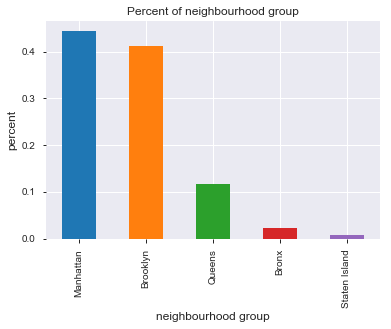

In [13]:
#visualize the categorical values for the neighbourhood_group
plt.figure(figsize=(6,4))
count_neigh = data.neighbourhood_group.value_counts()
(count_neigh/data.shape[0]).plot(kind='bar');
plt.title('Percent of neighbourhood group', fontsize = 12)
plt.ylabel('percent', fontsize = 12)
plt.xlabel('neighbourhood group', fontsize = 12)

In the listed neighborhood group the amount of business in Manhattan is largest and in Staten Island is the smallest. This is expected because in Manhattan and Brooklyn the amount of tourist is higher than the other because of their diiferent attarction of tourists in the area. 

Text(0, 0.5, 'the percent of every room type')

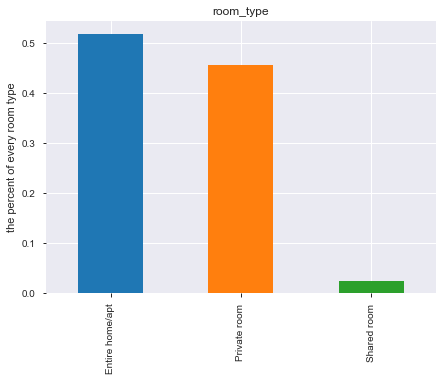

In [14]:
#visualize the categorical values for the room_type
plt.figure(figsize=(7,5))
count_room = data.room_type.value_counts()
(count_room/data.shape[0]).plot(kind='bar');
plt.title('room_type')
plt.ylabel('the percent of every room type')

This variable is an indication of the human prefence with the nature of house and status of privacy. In all nighborhood the amount of people serving in home/apartment and private room is higher than shared room. Shared room business in this specific area is generally not significance. 

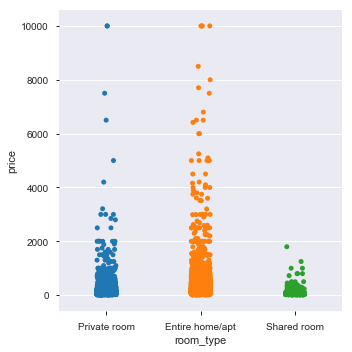

In [15]:
# reference: https://seaborn.pydata.org/generated/seaborn.catplot.html

sns.catplot(x="room_type", y="price", data=data);

In [16]:
data.groupby('room_type')[['price','number_of_reviews']].mean()

,price,number_of_reviews
room_type,,
Entire home/apt,211.794246,22.842418
Private room,89.780973,24.112962
Shared room,70.127586,16.600000


The Entire rooms/apartments cost are more than just a shared room, where as the differece in price of a shared room and a private one is about 20 dollars. In contrast, the number of viewrs are higher in private room than the other. This small price differece between private room and shared room may lead to prefer the private room. 


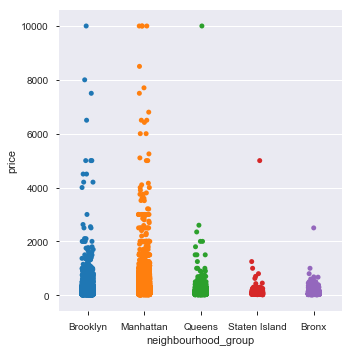

In [17]:
sns.catplot(x="neighbourhood_group", y="price", data=data);

In [18]:
def plot_price_wrt_room_type(data,title):
    data2 = data.pivot(columns='room_type',values='price')
    x1=list(data2[data2.columns[0]])
    x2=list(data2[data2.columns[1]])
    x3=list(data2[data2.columns[2]])

    plt.figure(figsize=(8, 6))
    plt.rc('legend',**{'fontsize':12})
    plt.legend(fontsize=15)
    plt.rcParams['figure.figsize']=(15,8)
    plt.style.use(style='ggplot')
    plt.tick_params(labelsize=12)
    plt.tick_params(labelsize=12)
    plt.ylabel("Count",fontsize=12,color='black')
    plt.xlabel("Price",fontsize=12,color='black')
    plt.title(title,fontsize=12,color='black')
    plt.legend(prop={'size': 10}) 
    n_bins=12
    colors = ['orange', 'aqua', 'green']
    labels=[data2.columns[0],data2.columns[1],data2.columns[2]]
    plt.hist([x1, x2, x3], n_bins, histtype='bar', 
             color=colors, range=[0,300],label=labels,alpha=1)
         
    plt.legend(loc="upper right")
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
D:\Users\William\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\William\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


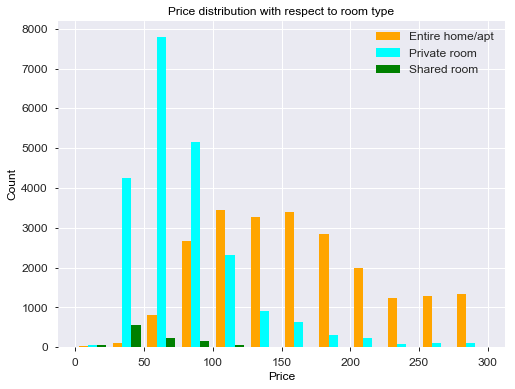

In [19]:
title='Price distribution with respect to room type'
plot_price_wrt_room_type(data,title)

In [20]:
def plot_price_wrt_neigbourhood_group(data,title):
    data2 = data.pivot(columns='neighbourhood_group',values='price')
    x1=list(data2[data2.columns[0]])
    x2=list(data2[data2.columns[1]])
    x3=list(data2[data2.columns[2]])
    x4=list(data2[data2.columns[3]])
    x5=list(data2[data2.columns[4]])

    plt.figure(figsize=(9, 7))
    plt.style.use(style='ggplot')
    plt.rc('legend',**{'fontsize':12})
    plt.tick_params(labelsize=25) 
    plt.legend(fontsize=20)
    plt.rcParams['figure.figsize']=(15,8)       
    plt.ylabel("Count",fontsize=12,color='black')
    plt.xlabel("Price",fontsize=12,color='black')
    plt.title(title,fontsize=12,color='black')
    plt.legend(prop={'size': 8}) 
    plt.tick_params(labelsize=12)
    n_bins=12
    colors = ['yellow', 'red', 'green', 'black', 'blue']
    labels=[data2.columns[0],data2.columns[1],data2.columns[2], data2.columns[3], data2.columns[4]]
    plt.hist([x1, x2, x3, x4, x5], n_bins, histtype='bar', 
             color=colors, range=[0,400],label=labels,alpha=1)
         
    plt.legend(loc="upper right")
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
D:\Users\William\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\William\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


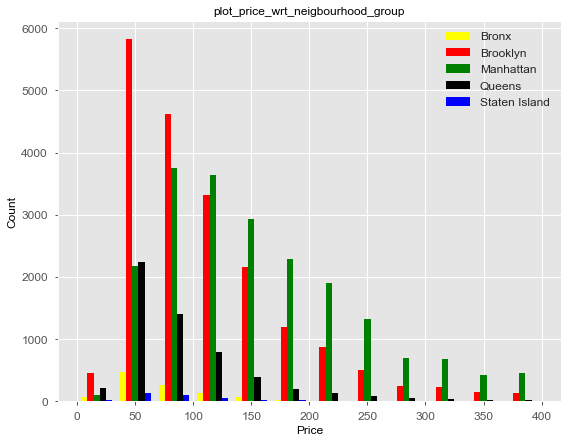

In [21]:
title='plot_price_wrt_neigbourhood_group'
plot_price_wrt_neigbourhood_group(data,title)

In [22]:
#plt.subplot2grid((2,3), (0,0))
#data.room_type[data.neighbourhood_group == "..... "].value_counts(normalize = True).plot(kind = "bar", alpha= 0.5)
#plt.title("room_type with neigbourhood_group")

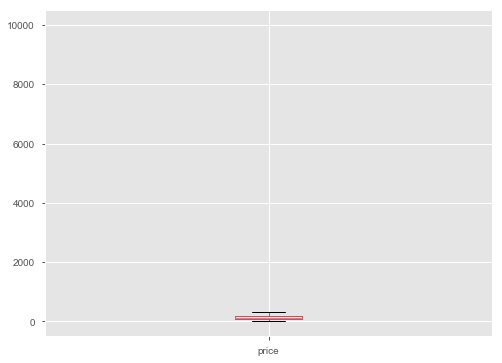

In [23]:
plt.figure(figsize=(8,6))
data.boxplot(column='price', return_type='axes')  
plt.show()

To see the average value and how it devate from the    -----

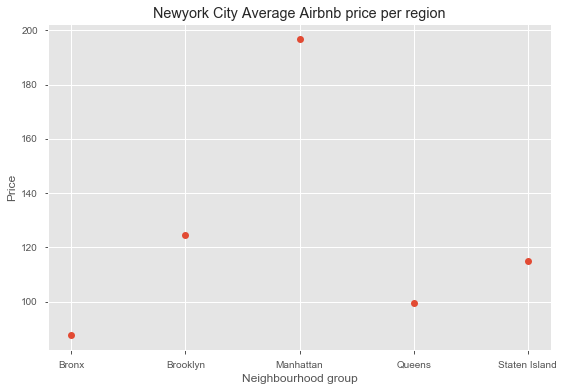

In [24]:
plt.figure(figsize = (9, 6))
plt.plot(data.groupby(['neighbourhood_group'])['price'].mean().keys(),data.groupby(['neighbourhood_group'])['price'].mean().values,'o')
plt.title('Newyork City Average Airbnb price per region')
plt.ylabel('Price')
plt.xlabel('Neighbourhood group')
color = ['DarkBlue']
plt.show()


As we see that the average price in Manhattan is higher than in other regions. Manhattan is the most populated of Newyork City. it is among the world's major commerical, financial and cultural ceters. because of this the area has high tourists. 

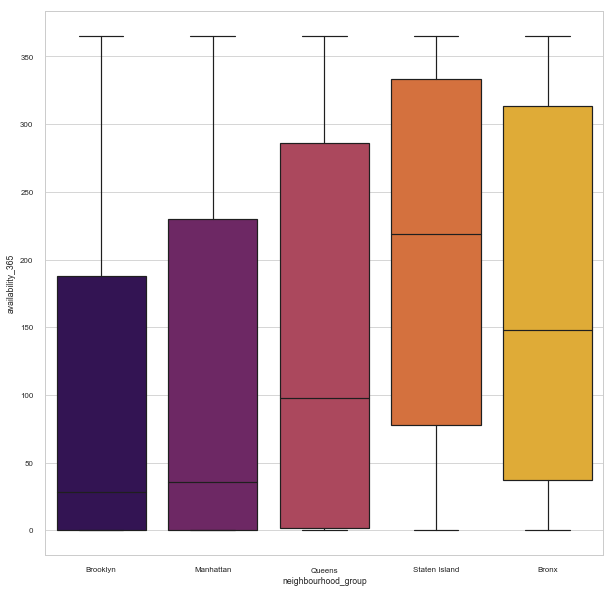

In [25]:
#boxplot neighbourhood_group and room availability
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9) 
plt.figure(figsize=(10,10))                                                           
plt.tight_layout()                                                                    
                                               
sns.despine(left=True, bottom=True)                                                   
plt.savefig('test.pdf', bbox_inches='tight') 
df1 = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='inferno')



### Neighbourhood gorup colored by price

In [26]:
# reference: https://plot.ly/python/line-and-scatter/
regions_dict = {value: i for i,value in enumerate(data.neighbourhood_group.unique())}
reverse_regions_dict = {i:v for v,i in regions_dict.items()}
data = data.applymap(lambda s: regions_dict.get(s) if s in regions_dict.keys() else s)

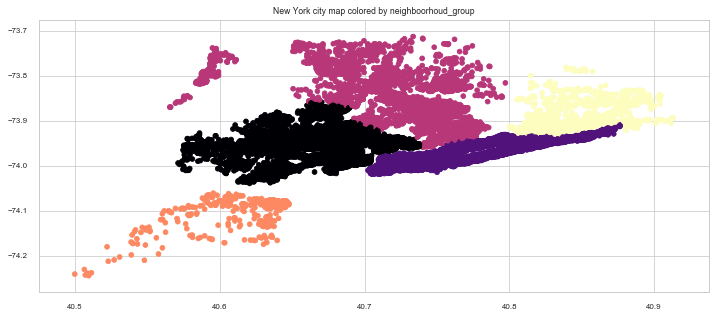

In [27]:
# reference: https://plot.ly/python/line-and-scatter/
plt.figure(figsize=(12, 5))
plt.scatter(data.latitude,data.longitude, c = data.neighbourhood_group,cmap='magma')
plt.title('New York city map colored by neighboorhoud_group')
plt.show()

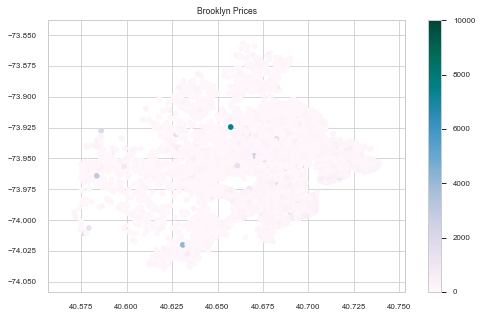

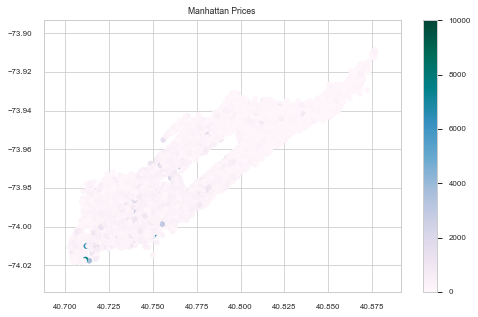

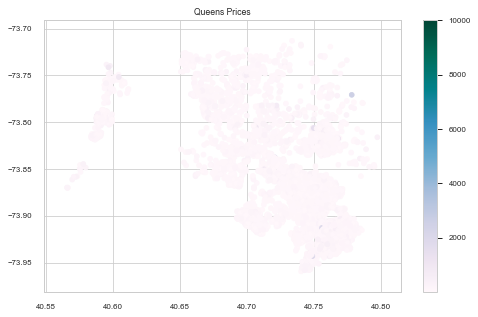

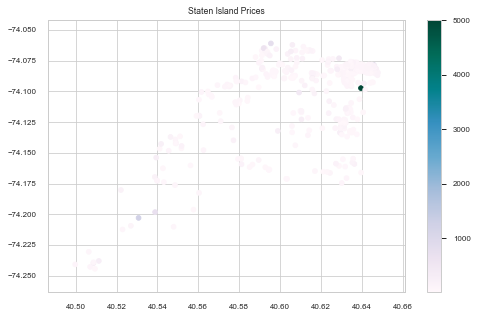

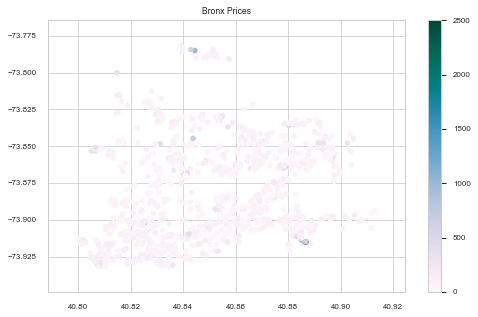

In [28]:

for i,region in enumerate(data.groupby(['neighbourhood_group'])['price'].mean().keys()):
    NY_data  = data[data.neighbourhood_group == region]
    plt.figure(figsize=(8, 5))
    # xxx, sub = plt.subplots(1, 2)
    plt.scatter(NY_data.latitude, NY_data.longitude, c = NY_data.price,cmap='PuBuGn')
    plt.title('{} Prices'.format(reverse_regions_dict[region]))
    plt.colorbar()
    plt.show()

When we look at the amount of owners per region, it is interesting to notice that in the regions where the rent price is
higher, the number of owners is also higher. That is probably due to the fact that as the apartments cost more in such regions
is harder to find owners of two or more houses there.

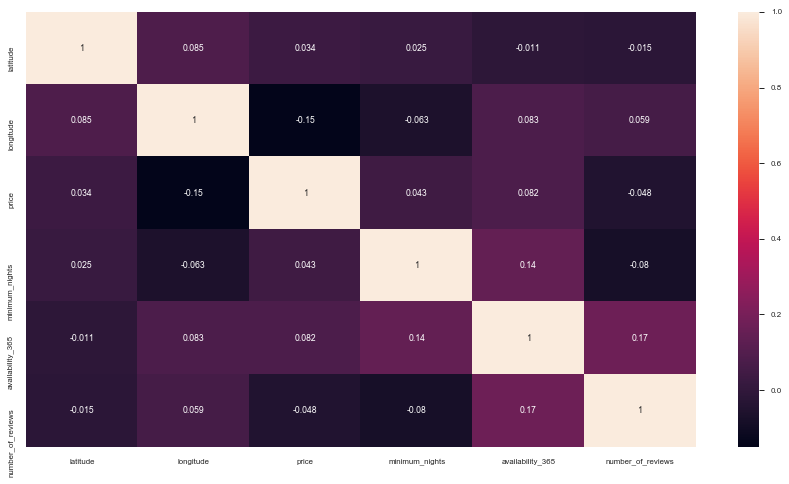

In [29]:
sns.heatmap(data[['latitude','longitude','price','minimum_nights','availability_365','number_of_reviews']].corr(),annot=True)
plt.show()

As seen in the correlation matrix, homes that are more available tend to have more reviews, which is natural,
since as the place is avaliable more days in a year more people can rent it.

In [30]:
def plot_price_group(data):
    '''
    This function for plotting the price distribution for every neighbourhood group
    
    input -> the dataframe
    output -> plotting the price distribution on average for every  neighbourhood group based on the neighbourhoods
    '''
    neigh_list = data['neighbourhood_group'].unique().tolist()
    fig,axs = plt.subplots(5,1,figsize=(20,20) )
    fig.subplots_adjust(hspace=1)

    i = 0
    for group in neigh_list:
        data_price = data[data.neighbourhood_group==group][["neighbourhood","price"]]
        data_price = data_price.groupby("neighbourhood").mean()
        sns.distplot(data_price, ax = axs[i])
        axs[i].set_xlabel(' The price in {}'.format(group))
        axs[i].set_title('the price distribution in {}'.format(group))
        i += 1

D:\Users\William\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


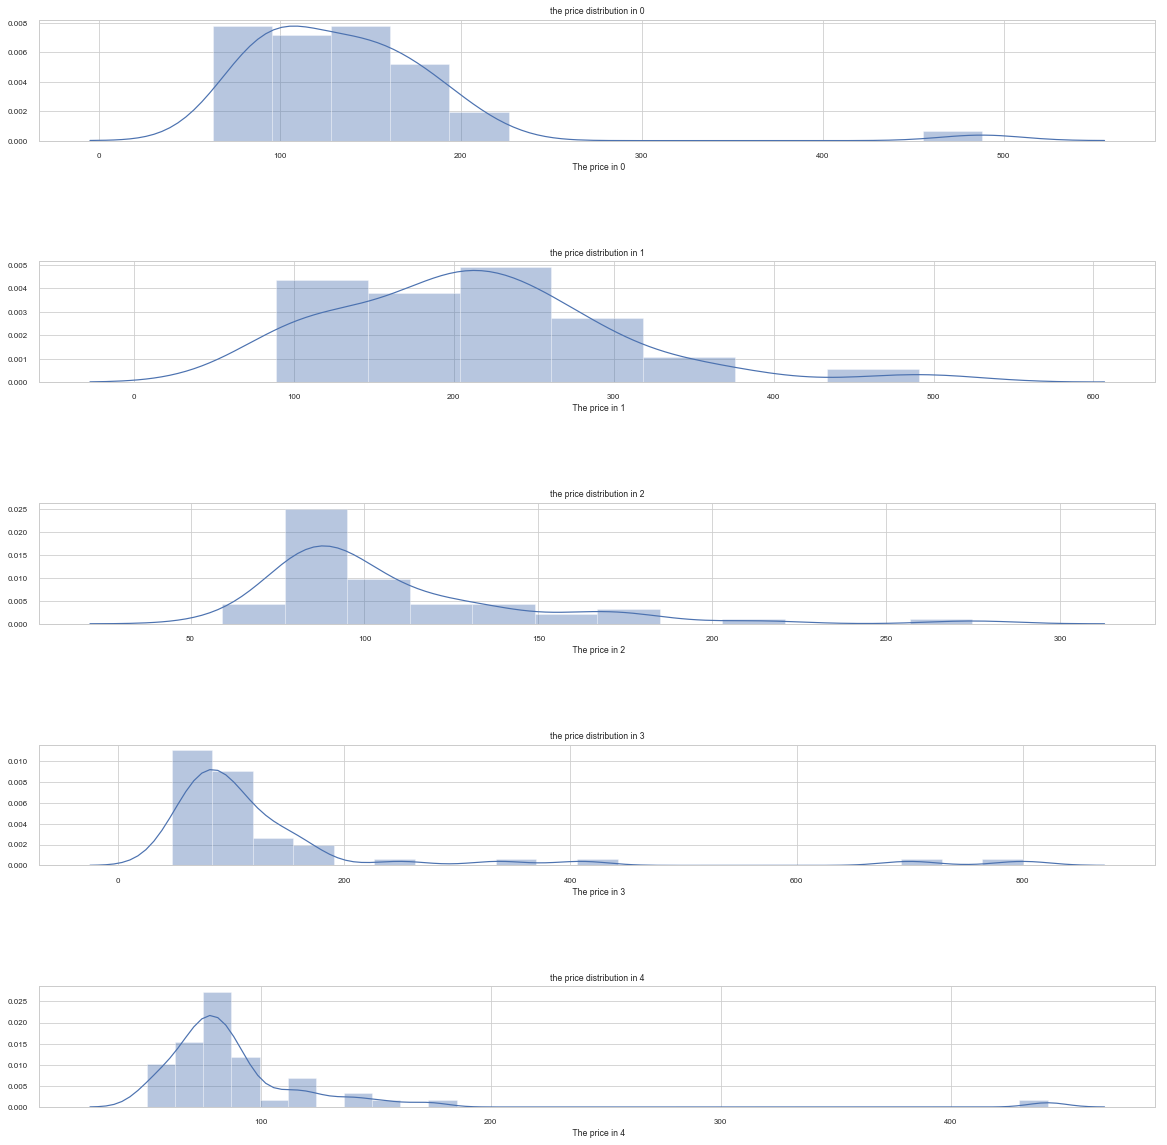

In [31]:
plot_price_group(data)

### Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

# ~~~SEAN~~~

### Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

# ~~~SEAN~~~

### Are there other features that could be added to the data or created from existing features? Which ones?

Multiple features were added in the first stage of the project. Zip codes were added to be used as a bridge to join features from other data sets. Additional features will be examined to provide further insight into the relationships between location, activity, supply and price. These include dist_subway, cnt_all, cnt_entire_home, cnt_private_room, cnt_shared_room, avgprice_entire_home, avgprice_private_room, and avgprice_shared_room. The features with names starting with 'cnt_' represent the count of listings for each room type within close proximity. Additionally, the features with names starting with 'avgprice_' represent the average price of listings within close proximity.

In [32]:
df1 = pd.read_csv("abnb_zip.csv")
df1.head()

FileNotFoundError: File b'abnb_zip.csv' does not exist

In [ ]:
df2 = pd.read_csv("abnb_dist_subway.csv")
df2 = df2.rename(columns = {"Origin":"ID"})

df2.head()

In [ ]:
df3 = pd.read_csv("abnb_grid.csv")
df3 = df3.rename(columns = {"id":"ID"})
df3.head()

In [ ]:
len(df1), len(df2), len(df3), 

In [ ]:
df_consolidated = pd.merge(pd.merge(df1, df2, on='ID'), df3, on = 'ID').drop(columns = ["grid", "LATITUDE", "LONGITUDE"])
df_consolidated = df_consolidated.rename(columns = {"Distance_Result":"dist_subway", "ID":"id"})

In [ ]:
df_consolidated.head()

In [ ]:
ab_nyc = pd.merge(airbnb, df_consolidated, on = "id")
ab_nyc.head()

## Exceptional Work

### You have free reign to provide additional analyses.
### One idea: implement dimensionality reduction, then visualize and interpret the results.

The latitude and longitude variables make it possible for high precision mapping of the individual rental units. Mapping provides a foundation for adding additional features with spatial reference (e.g. distance to subway station). Additionally, we have the opportunity to transform and create new variables from the existing data set. For example, a grid surface was overlaid throughout the study area to examine concentrations of rental units in close proximity to each other. Each individual grid cell encompasses an area of approximately 1M square feet. The features added for listing counts and average price were created from aggregating the original Airbnb listing data set by individual grid cell. A heat map of the study area provides insight on average sale price throughout the study area.

In [ ]:
import matplotlib.image as mpimg

img=mpimg.imread('avgprice1.png',0)

### Heat Map of Average Listing Price in New York

In [ ]:
imgplot = plt.imshow(img)

Listings with higher average price are represented in several concentrated areas throughout Manhattan. Prices appear to be more moderate in the other boroughs of The Bronx, Brooklyn, Queens and Staten Island. A more granular view into each of these areas will provide more insight on the feature relationships.